In [1]:
import numpy as np
import pandas as pd

from keras.utils import np_utils
from sklearn.utils import shuffle
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data_root = "../datasets/A_Z Handwritten Data/A_Z Handwritten Data.csv"

In [3]:
dataset = pd.read_csv(data_root).astype('float32') # import dataset
dataset.rename(columns={'0':"label"}, inplace=True) # rename the first column as label for 'Letters'

In [4]:
X = dataset.drop("label", axis = 1) # remove the fist column  
y = dataset["label"] # taking the first column

print(X.shape, y.shape)

(372450, 784) (372450,)


In [5]:
X = X.values

data = []

for flatten in X:
    image = np.reshape(flatten, (28, 28, 1))
    data.append(image)

X_data = np.array(data, dtype=np.float32)
y_target = y

print(X_data.shape, y_target.shape)


# X = np.array([np.reshape(flatten, (28, 28, 1)) for flatten in X], dtype=np.float32)

(372450, 28, 28, 1) (372450,)


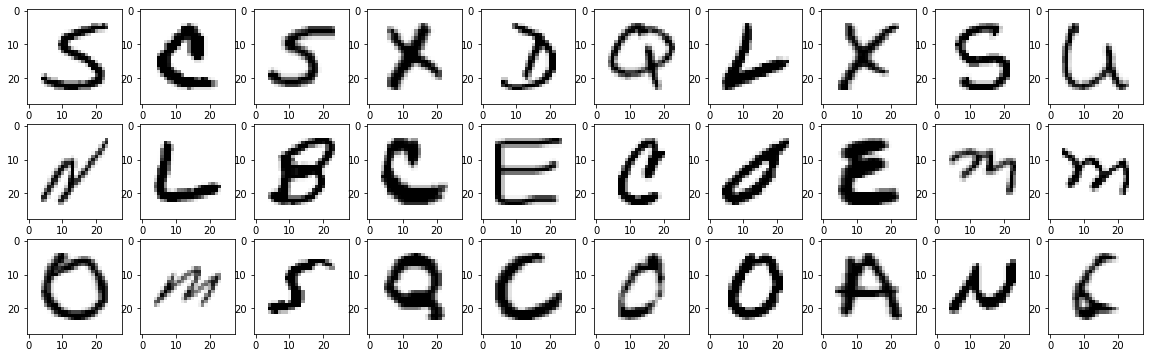

In [6]:
shuffled_data = shuffle(X_data)
rows, cols = 10, 3

plt.figure(figsize=(20, 6))

for i in range(rows * cols):
  plt.subplot(cols, rows, i+1)
  plt.imshow(shuffled_data[i].reshape(28, 28), interpolation="nearest", cmap="Greys")

plt.show()

In [7]:
train_data, test_data, train_labels, test_labels = train_test_split(X_data, y_target, test_size=0.2)

In [8]:
print(train_data.shape, train_labels.shape)
print(test_data.shape, test_labels.shape)

(297960, 28, 28, 1) (297960,)
(74490, 28, 28, 1) (74490,)


In [9]:
# Normalization

train_data = train_data / 255.0
test_data = test_data / 255.0


train_labels = np_utils.to_categorical(train_labels)
test_labels = np_utils.to_categorical(test_labels)


train_data = np.reshape(train_data, (train_data.shape[0], train_data.shape[1], train_data.shape[2], 1))
test_data = np.reshape(test_data, (test_data.shape[0], test_data.shape[1], test_data.shape[2], 1))

In [10]:
print(train_data.shape, test_data.shape)
print(train_labels.shape, test_labels.shape)

(297960, 28, 28, 1) (74490, 28, 28, 1)
(297960, 26) (74490, 26)


In [11]:
train_label_counts = [0 for i in range(26)]
test_label_counts = [0 for i in range(26)]

for i in range(train_data.shape[0]):
  train_label_counts[np.argmax(train_labels[i])] += 1

for i in range(test_data.shape[0]):
  test_label_counts[np.argmax(test_labels[i])] += 1

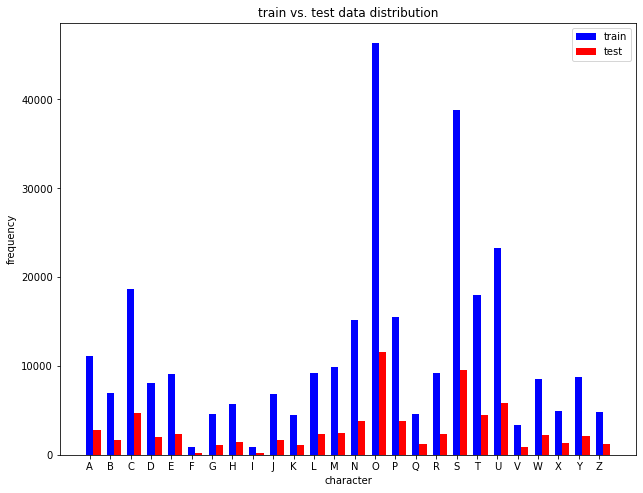

In [12]:
frequency = [
    train_label_counts, test_label_counts
] 

fig =  plt.figure(figsize=(8, 6))
ax = fig.add_axes([0, 0, 1, 1])
x = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
plt.xticks(range(len(frequency[0])), x)
plt.title("train vs. test data distribution")
plt.xlabel("character")
plt.ylabel("frequency")

ax.bar(np.arange(len(frequency[0])), frequency[0], color="b", width=0.35)
ax.bar(np.arange(len(frequency[1])) + 0.35, frequency[1], color="r", width=0.35)
ax.legend(labels=["train", "test"])

In [13]:
np.save("../datasets/A_Z Handwritten Data/train_data", train_data) 
np.save("../datasets/A_Z Handwritten Data/train_labels", train_labels)
np.save("../datasets/A_Z Handwritten Data/test_data", test_data)
np.save("../datasets/A_Z Handwritten Data/test_labels", test_labels)